In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio


In [2]:
# load data 
df = pd.read_csv('/Users/michaelweber/Stackfuel/DPP_2501/Portfolio_Project/co2_dashboard/df_multi.csv')


In [31]:
# 1.1: Wie haben sich die globalen CO₂-Emissionen über die letzten Jahrzehnte entwickelt?
import pandas as pd
import plotly.graph_objects as go

# 1. CSV-Datei laden (ersetze 'data.csv' mit dem tatsächlichen Pfad deiner Datei)
df = pd.read_csv('/Users/michaelweber/Stackfuel/DPP_2501/Portfolio_Project/co2_dashboard/df_multi.csv')

# 2. Sicherstellen, dass die relevanten Spalten vorhanden sind
if 'year' in df.columns and 'co2' in df.columns:
    # 3. Hinzufügen einer Spalte für Jahrzehnte
    df['decade'] = (df['year'] // 10) * 10

    # 4. Aggregation der CO₂-Emissionen nach Jahrzehnten
    emissions_by_decade = df.groupby('decade', as_index=False)['co2'].sum()

    # 5. Erstellen der Plotly-Balkengrafik
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=emissions_by_decade['decade'],  # Jahrzehnte auf der x-Achse
        y=emissions_by_decade['co2'],     # Summierte CO₂-Emissionen auf der y-Achse
        marker_color='steelblue',         # Farbe der Balken
        name='CO₂-Emissionen'
    ))

    # 6. Layout-Anpassungen, um alle Jahrzehnte zu beschriften
    fig.update_layout(
        title='Globale CO₂-Emissionen pro Jahrzehnt (1900–2020)',
        title_font=dict(size=16),
        xaxis=dict(
            title='Jahrzehnt',
            titlefont=dict(size=12),
            tickangle=0,  # Drehung der x-Achsen-Beschriftungen
            tickfont=dict(size=10),
            tickmode='linear',  # Alle Jahrzehnte anzeigen
            tick0=emissions_by_decade['decade'].min(),  # Startpunkt
            dtick=10  # Schrittweite von 10 Jahren
        ),
        yaxis=dict(
            title='CO₂-Emissionen (Millionen Tonnen)',
            titlefont=dict(size=12),
            tickfont=dict(size=10),
            showgrid=True,  # Gitter aktivieren
            gridcolor='rgba(200, 200, 200, 0.5)'  # Gitterlinienfarbe
        ),
        bargap=0.2,  # Abstand zwischen Balken
        plot_bgcolor='rgba(245, 245, 245, 1)',  # Hintergrundfarbe
    )

    # 7. Anzeige der Grafik
    fig.show()
else:
    print("Die CSV-Datei muss die Spalten 'year' und 'co2' enthalten!")


In [34]:
import pandas as pd
import plotly.graph_objects as go

# 1. CSV-Datei laden (ersetze 'data.csv' mit dem tatsächlichen Pfad deiner Datei)
df = pd.read_csv('/Users/michaelweber/Stackfuel/DPP_2501/Portfolio_Project/co2_dashboard/df_multi.csv')

# 2. Sicherstellen, dass die relevanten Spalten vorhanden sind
if 'year' in df.columns and 'co2' in df.columns:
    # 3. Filter auf die Jahre 2000 bis 2023
    df_filtered = df[(df['country'] == 'Germany') & (df['year'] >= 2000) & (df['year'] <= 2023)]

    # 4. Aggregation der CO₂-Emissionen pro Jahr (falls notwendig)
    emissions_by_year = df_filtered.groupby('year', as_index=False)['co2'].sum()

    # 5. Erstellen der Plotly-Balkengrafik
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=emissions_by_year['year'],  # Jahre auf der x-Achse
        y=emissions_by_year['co2'],   # CO₂-Emissionen auf der y-Achse
        marker_color='steelblue',     # Farbe der Balken
        name='CO₂-Emissionen'
    ))

    # 6. Layout-Anpassungen
    fig.update_layout(
        title='Deutschland: CO₂-Emissionen pro Jahr (2000–2023)',
        title_font=dict(size=16),
        xaxis=dict(
            title='Jahr',
            titlefont=dict(size=12),
            tickangle=45,  # Drehung der x-Achsen-Beschriftungen
            tickfont=dict(size=10),
            tickmode='linear',  # Alle Jahre anzeigen
            tick0=2000,  # Startpunkt der Jahre
            dtick=1  # Schrittweite von 1 Jahr
        ),
        yaxis=dict(
            title='CO₂-Emissionen (Millionen Tonnen)',
            titlefont=dict(size=12),
            tickfont=dict(size=10),
            showgrid=True,  # Gitter aktivieren
            gridcolor='rgba(200, 200, 200, 0.5)'  # Gitterlinienfarbe
        ),
        bargap=0.2,  # Abstand zwischen Balken
        plot_bgcolor='rgba(245, 245, 245, 1)',  # Hintergrundfarbe
    )

    # 7. Anzeige der Grafik
    fig.show()
else:
    print("Die CSV-Datei muss die Spalten 'year' und 'co2' enthalten!")


In [107]:
# 1.2: Gibt es erkennbare Sprünge oder Rückgänge (z. B. Wirtschaftskrisen, Pandemien)?
import pandas as pd
import plotly.express as px

df = pd.read_csv('/Users/michaelweber/Repositories/co2-emissions/df_multi_backup.csv')

# Filterung der relevanten Jahre
filtered_df = df[(df['year'] >= 1900) & (df['year'] <= 2022)]

# Gruppierung nach Jahr und Aggregation der CO₂-Emissionen
emissions_by_year = filtered_df.groupby('year')['co2'].sum().reset_index()

# Highlight-Jahre für spezifische Ereignisse
highlight_years = [1929, 1945, 1973, 1979, 2008, 2020]  # Beispiele: Weltwirtschaftskrise, Weltkriege, etc.

# Erstellen der Linie 
fig = px.line(
    emissions_by_year, 
    x='year', 
    y='co2', 
    title='Globale CO₂-Emissionen (1900–2022) mit Markierung von Schlüsselereignissen',
    labels={'year': 'Jahr', 'co2': 'CO₂-Emissionen (Millionen Tonnen)'},
    markers=False  
)

# Markierungen für spezifische Ereignisse hinzufügen
for year in highlight_years:
    #fig.add_vline(
    #    x=year, 
    #    line_width=2, 
    #    line_dash="dash", 
    #    line_color="red"
    #)
    # Hinzufügen des Textes über den Linien
    y_value = emissions_by_year[emissions_by_year['year'] == year]['co2'].values[0]
    fig.add_annotation(
        x=year,
        y=y_value,
        text={'1929': 'Weltwirtschaftskrise', '1945': 'Ende des 2. Weltkriegs', '1973': '1. Ölpreiskrise', '1979': '2. Ölpreiskrise','2008': 'Finanzkrise', '2020': 'COVID-19'}.get(str(year), ''),
        showarrow=True,  
        arrowhead=2,     
        arrowsize=1,     
        arrowcolor="red",
        font=dict(color="red"),
        yshift=10,       
        textangle=0     
    )

# Anpassungen
fig.update_layout(
    xaxis=dict(title='Jahr', tickangle=0),
    yaxis=dict(title='CO₂-Emissionen (Millionen Tonnen)', showgrid=True, gridcolor='rgba(255, 255, 255, 1)'),
    plot_bgcolor='rgba(245, 245, 245, 1)',  
    title_font=dict(size=16),
    font=dict(size=12)
)


fig.show()

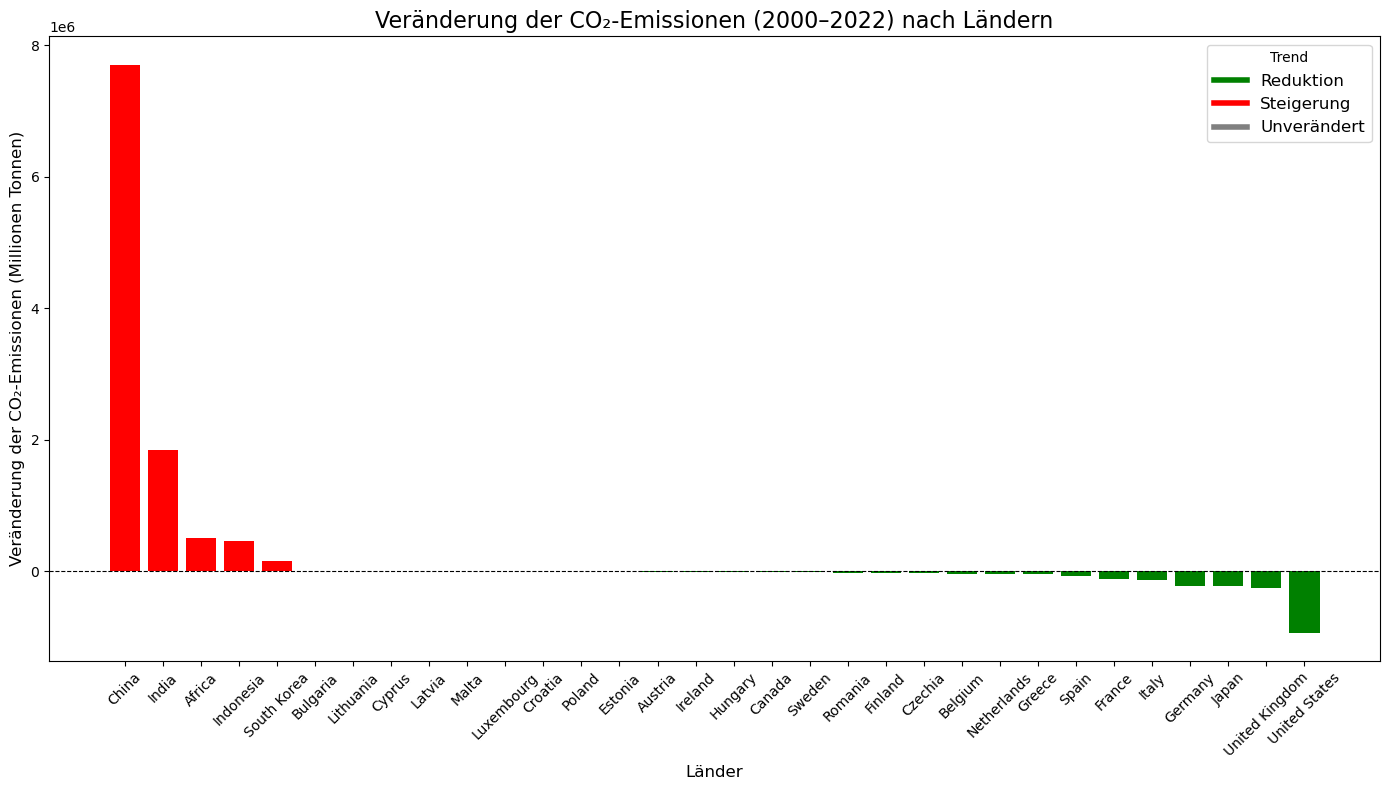

           country   co2_2000    co2_2022     change      trend
5            China  3649227.0  11350538.0  7701311.0  increased
15           India   986445.0   2831166.0  1844721.0  increased
0           Africa   930851.0   1432503.0   501652.0  increased
16       Indonesia   281330.0    737073.0   455743.0  increased
27     South Korea   439981.0    602092.0   162111.0  increased
3         Bulgaria    45592.0     46966.0     1374.0  increased
21       Lithuania    11878.0     12857.0      979.0  increased
7           Cyprus     7102.0      7198.0       96.0  increased
20          Latvia     7082.0      6620.0     -462.0    reduced
23           Malta     2468.0      1774.0     -694.0    reduced
22      Luxembourg     8702.0      7277.0    -1425.0    reduced
6          Croatia    19652.0     17608.0    -2044.0    reduced
25          Poland   317452.0    315042.0    -2410.0    reduced
9          Estonia    15471.0     11757.0    -3714.0    reduced
1          Austria    66177.0     61489.

In [6]:
# 2. Welche Länder haben in den letzten 20 Jahren ihre Emissionen reduziert oder gesteigert?
# Filterung der Daten für die Jahre 2000 und 2022
df_recent = df[df['year'].isin([2000, 2022])]

# Pivot-Tabelle: Vergleich der Emissionen zwischen 2000 und 2022
emission_changes = df_recent.pivot(index='country', columns='year', values='co2').reset_index()
emission_changes.columns = ['country', 'co2_2000', 'co2_2022']

# Berechnung der Differenz
emission_changes['change'] = emission_changes['co2_2022'] - emission_changes['co2_2000']

# Klassifizierung: Reduktion, Steigerung oder gleichgeblieben
emission_changes['trend'] = emission_changes['change'].apply(
    lambda x: 'reduced' if x < 0 else ('increased' if x > 0 else 'unchanged')
)

# Sortieren nach Veränderung
emission_changes = emission_changes.sort_values(by='change', ascending=False)

# Visualisierung: Veränderung der Emissionen
plt.figure(figsize=(14, 8))
plt.bar(emission_changes['country'], emission_changes['change'], color=emission_changes['trend'].map({'reduced': 'green', 'increased': 'red', 'unchanged': 'gray'}))

# Titel und Beschriftungen
plt.title('Veränderung der CO₂-Emissionen (2000–2022) nach Ländern', fontsize=16)
plt.xlabel('Länder', fontsize=12)
plt.ylabel('Veränderung der CO₂-Emissionen (Millionen Tonnen)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()

# Legende manuell hinzufügen
colors = {'reduced': 'green', 'increased': 'red', 'unchanged': 'gray'}
labels = {'reduced': 'Reduktion', 'increased': 'Steigerung', 'unchanged': 'Unverändert'}
handles = [plt.Line2D([0], [0], color=colors[key], lw=4, label=labels[key]) for key in colors]
plt.legend(handles=handles, title="Trend", fontsize=12)

plt.show()

# Ausgabe der Tabelle mit Veränderungen
print(emission_changes[['country', 'co2_2000', 'co2_2022', 'change', 'trend']])

In [104]:
# 3. Wer verursacht das meiste CO2? (Regionalen Unterschiede)
# 3.1 Welche Länder tragen am meisten zu den globalen Emissionen bei?

import plotly.graph_objects as go
import pandas as pd

# Gruppierung nach Ländern und Summierung der CO₂-Emissionen
country_emissions = df.groupby('country')['co2'].sum().reset_index()

# Sortieren der Länder nach den höchsten CO₂-Emissionen
top_countries = country_emissions.sort_values(by='co2', ascending=False).head(10)

# Visualisierung mit Plotly Graph Objects
fig = go.Figure()

# Hinzufügen der Balken
fig.add_trace(go.Bar(
    x=top_countries['country'],
    y=top_countries['co2'],
    marker_color='steelblue',
))

# Layout-Anpassungen
fig.update_layout(
    title='Top-10 Länder nach globalen CO₂-Emissionen (1900–2022)',
    xaxis_title='Länder',
    yaxis=dict(title='CO₂-Emissionen (Millionen Tonnen)', showgrid=True, gridcolor='rgba(255, 255, 255, 1)'),
    xaxis_tickangle=30,
    template='plotly_white',
    plot_bgcolor='rgba(245, 245, 245, 1)'
)

# Anzeige der Visualisierung
fig.show()


In [3]:
# 2.2 Wie unterscheiden sich die Pro-Kopf-Emissionen?
# Gruppierung nach Ländern und Berechnung des Mittelwerts der Pro-Kopf-Emissionen
import plotly.express as px
import pandas as pd

# Gruppierung und Mittelwert der Pro-Kopf-Emissionen berechnen
country_per_capita = df.groupby('country')['co2_per_capita'].mean().reset_index()

# Sortieren der Länder nach Pro-Kopf-Emissionen
sorted_countries = country_per_capita.sort_values(by='co2_per_capita', ascending=False)

# Visualisierung mit Plotly
fig = px.bar(
    sorted_countries,
    x='country',
    y='co2_per_capita',
    title='Durchschnittliche Pro-Kopf-Emissionen nach Ländern (1900–2022)',
    labels={'co2_per_capita': 'Pro-Kopf-Emissionen (Tonnen)', 'country': 'Länder'},
    text='co2_per_capita',
)

# Layout-Anpassungen
fig.update_traces(marker_color='orange', texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis=dict(tickangle=45),
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.2)'),
    font=dict(size=12),
    title_font_size=16,
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=50, b=150),
)

# Anzeige der Grafik
fig.show()


In [94]:
import plotly.express as px

# NaN-Werte in den relevanten Spalten entfernen
df_cleaned = df.dropna(subset=['gdp', 'co2', 'population'])

# 3.1 Zusammenhang zwischen GDP und CO₂-Emissionen
fig_gdp_co2 = px.scatter(
    df_cleaned,
    x='gdp',
    y='co2',
    color='country',
    size='co2',  # Punktgröße basierend auf CO₂-Emissionen
    hover_name='country',
    log_x=True,  # Log-Skalierung der GDP-Achse
    title='Zusammenhang zwischen GDP und CO₂-Emissionen',
    labels={'gdp': 'GDP (Bruttoinlandsprodukt, Milliarden USD)', 'co2': 'CO₂-Emissionen (Millionen Tonnen)'},
    template='plotly_white'
)

fig_gdp_co2.update_layout(
    height=600,
    width=900,
    xaxis=dict(title='GDP (Log-Skala)', showgrid=True, gridcolor='rgba(255, 255, 255, 1)'),
    yaxis=dict(title='CO₂-Emissionen (Millionen Tonnen)', showgrid=True, gridcolor='rgba(255, 255, 255, 1)'),
    legend_title_text='Länder',
    plot_bgcolor='rgba(245, 245, 245, 1)'
)
fig_gdp_co2.show()

# 3.2 Zusammenhang zwischen Bevölkerungsgröße und CO₂-Emissionen
fig_population_co2 = px.scatter(
    df_cleaned,
    x='population',
    y='co2',
    color='country',
    size='co2',  # Punktgröße basierend auf CO₂-Emissionen
    hover_name='country',
    log_x=True,  # Log-Skalierung der Bevölkerungs-Achse
    title='Zusammenhang zwischen Bevölkerungsgröße und CO₂-Emissionen',
    labels={'population': 'Bevölkerung (in Millionen)', 'co2': 'CO₂-Emissionen (Millionen Tonnen)'},
    template='plotly_white'
)

fig_population_co2.update_layout(
    height=600,
    width=900,
    xaxis=dict(title='Bevölkerung (Log-Skala)', showgrid=True, gridcolor='rgba(255, 255, 255, 1)'),
    yaxis=dict(title='CO₂-Emissionen (Millionen Tonnen)', showgrid=True, gridcolor='rgba(255, 255, 255, 1)'),
    legend_title_text='Länder',
    plot_bgcolor='rgba(245, 245, 245, 1)'
)
fig_population_co2.show()


In [82]:
fig_line = px.line(
    df_cleaned,
    x='year',
    y='co2',
    color='country',
    line_group='country',
    title='Entwicklung von CO₂-Emissionen und GDP über die Jahre',
    labels={'year': 'Jahr', 'co2': 'CO₂-Emissionen (Millionen Tonnen)', 'gdp': 'GDP (Milliarden USD)'},
    template='plotly_white'
    
)

fig_line.update_layout(
    height=600,
    width=900,
    xaxis_title='Jahr',
    yaxis_title='CO₂-Emissionen (Millionen Tonnen)',
    plot_bgcolor='rgba(245, 245, 245, 1)'
)
fig_line.show()


In [127]:
import pandas as pd
import plotly.graph_objects as go

# Berechnung der Top 5 Länder basierend auf Gesamtemissionen
top_5_countries = df_cleaned.groupby('country')['co2'].sum().nlargest(5).index

# Filtern des DataFrames für die Top 5 Länder
df_top_5 = df_cleaned[df_cleaned['country'].isin(top_5_countries)]

# Erstellung der Figure
fig = go.Figure()

# Hinzufügen der CO₂-Emissionen für die Top-5-Länder
for country in top_5_countries:
    country_data = df_top_5[df_top_5['country'] == country]
    fig.add_trace(
        go.Scatter(
            x=country_data['year'],
            y=country_data['co2'],
            mode='lines',
            name=f"{country} - CO₂-Emissionen",
            line=dict(width=2),
        )
    )

# Hinzufügen des GDP für die Top-5-Länder (sekundäre Achse)
for country in top_5_countries:
    country_data = df_top_5[df_top_5['country'] == country]
    fig.add_trace(
        go.Scatter(
            x=country_data['year'],
            y=country_data['gdp'],
            mode='lines',
            name=f"{country} - GDP",
            line=dict(width=1, dash='dot'),
            yaxis='y2',  # Zuweisung zur zweiten Y-Achse
        )
    )

# Layout der Figure anpassen
fig.update_layout(
    title='Entwicklung von CO₂-Emissionen und GDP (Top 5 Länder)',
    xaxis=dict(title='Jahr',  showgrid=True, gridcolor='rgba(255, 255, 255, 1)'),
    yaxis=dict(
        title='CO₂-Emissionen (Millionen Tonnen)',
        titlefont=dict(color='black'),
        tickfont=dict(color='black'),
        showgrid=True, gridcolor='rgba(255, 255, 255, 1)'
    ),
    yaxis2=dict(
        title='GDP (Milliarden USD)',
        titlefont=dict(color='black'),
        tickfont=dict(color='black'),
        anchor='x',
        overlaying='y',
        side='right',
        showgrid=True, gridcolor='rgba(255, 255, 255, 1)'
    ),
    legend=dict(
        x=1.1,
        y=1.0,
        title='Legende',
    ),
    height=600,
    width=1300,
    template='plotly_white',
    plot_bgcolor='rgba(245, 245, 245, 1)'
)

# Anzeige
fig.show()


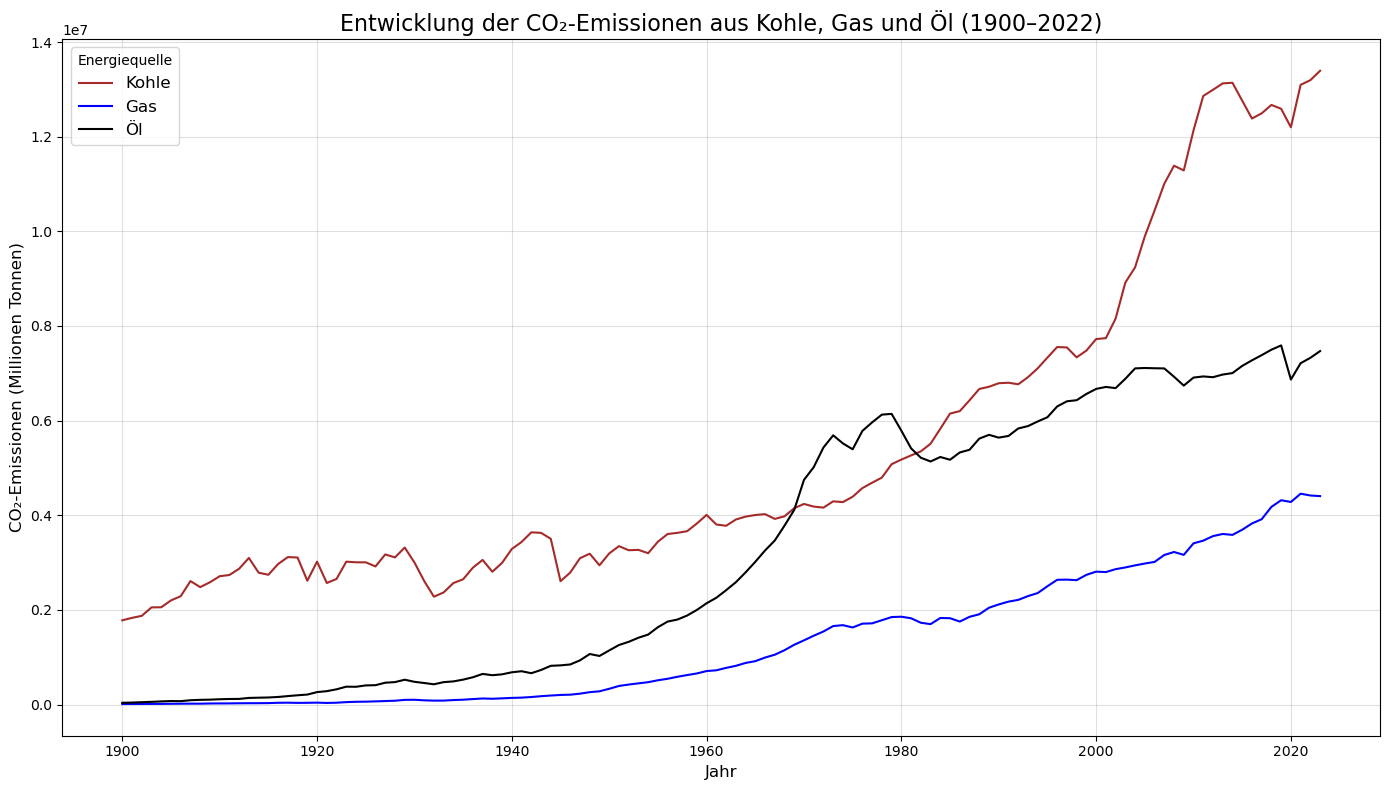

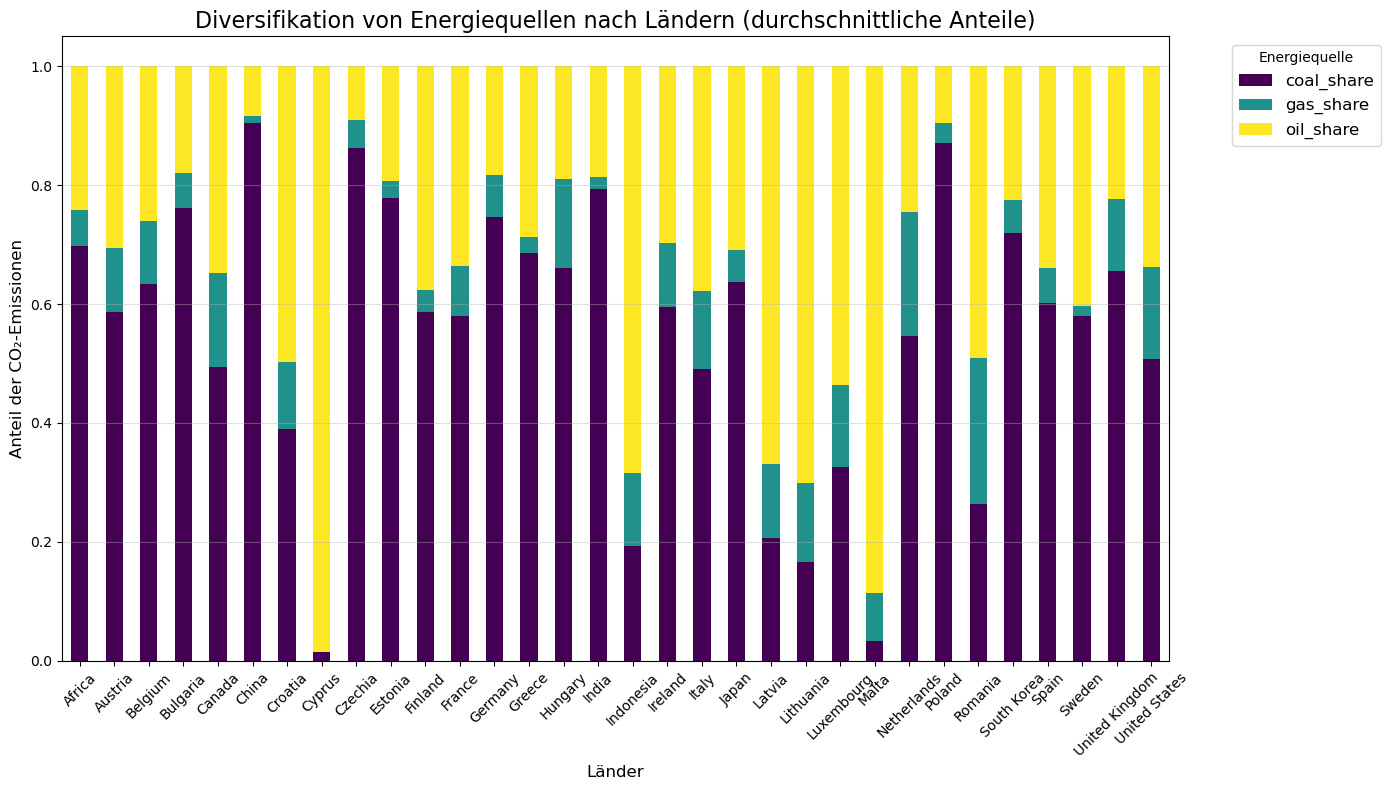

In [23]:
# 4.1 Wie haben sich CO₂-Emissionen aus Kohle, Gas und Öl über die Zeit verändert?
# Gruppierung nach Jahr und Summierung der Emissionen aus Kohle, Gas und Öl
emissions_by_year = df.groupby('year')[['coal_co2', 'gas_co2', 'oil_co2']].sum().reset_index()

# Visualisierung
plt.figure(figsize=(14, 8))
plt.plot(emissions_by_year['year'], emissions_by_year['coal_co2'], label='Kohle', color='brown')
plt.plot(emissions_by_year['year'], emissions_by_year['gas_co2'], label='Gas', color='blue')
plt.plot(emissions_by_year['year'], emissions_by_year['oil_co2'], label='Öl', color='black')

# Titel und Beschriftungen
plt.title('Entwicklung der CO₂-Emissionen aus Kohle, Gas und Öl (1900–2022)', fontsize=16)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('CO₂-Emissionen (Millionen Tonnen)', fontsize=12)
plt.legend(title='Energiequelle', fontsize=12)
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()

# 4.2 Gibt es Länder, die ihre Energiequellen erfolgreich diversifiziert haben?
# Berechnung des Anteils jeder Energiequelle an den gesamten CO₂-Emissionen pro Land
df['total_energy_emissions'] = df['coal_co2'] + df['gas_co2'] + df['oil_co2']
df['coal_share'] = df['coal_co2'] / df['total_energy_emissions']
df['gas_share'] = df['gas_co2'] / df['total_energy_emissions']
df['oil_share'] = df['oil_co2'] / df['total_energy_emissions']

# Durchschnittlicher Anteil jeder Energiequelle pro Land über die Zeit
diversification = df.groupby('country')[['coal_share', 'gas_share', 'oil_share']].mean().reset_index()

# Visualisierung der Diversifikation
diversification.set_index('country').plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Titel und Beschriftungen
plt.title('Diversifikation von Energiequellen nach Ländern (durchschnittliche Anteile)', fontsize=16)
plt.xlabel('Länder', fontsize=12)
plt.ylabel('Anteil der CO₂-Emissionen', fontsize=12)
plt.legend(title='Energiequelle', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=10, rotation=45)
plt.grid(axis='y', alpha=0.4)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# CSV-Datei laden
df = pd.read_csv('/Users/michaelweber/Repositories/co2-emissions/df_multi_backup.csv')

# Überprüfen, welche Spalten verfügbar sind
print(df.columns)

# Falls nötig, DataFrame mit den relevanten Spalten erstellen
emissions_by_year = df[['year', 'coal_co2', 'gas_co2', 'oil_co2']].dropna()

# Sicherstellen, dass die Werte nach Jahr sortiert sind
emissions_by_year = emissions_by_year.sort_values(by='year')

# Erstellen der Figur
fig = go.Figure()

# Hinzufügen der Linien für Kohle, Gas und Öl
fig.add_trace(go.Scatter(
    x=emissions_by_year['year'], 
    y=emissions_by_year['coal_co2'], 
    mode='lines', 
    name='Kohle', 
    line=dict(color='brown')
))
fig.add_trace(go.Scatter(
    x=emissions_by_year['year'], 
    y=emissions_by_year['gas_co2'], 
    mode='lines', 
    name='Gas', 
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=emissions_by_year['year'], 
    y=emissions_by_year['oil_co2'], 
    mode='lines', 
    name='Öl', 
    line=dict(color='black')
))

# Layout-Anpassungen
fig.update_layout(
    title='Entwicklung der CO₂-Emissionen aus Kohle, Gas und Öl (1900–2022)',
    xaxis_title='Jahr',
    yaxis_title='CO₂-Emissionen (Millionen Tonnen)',
    legend_title='Energiequelle',
    font=dict(size=12),
    title_font_size=16,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.2)'),
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.2)'),
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()



Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [116]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('/Users/michaelweber/Repositories/co2-emissions/df_multi_backup.csv')

import plotly.graph_objects as go
import pandas as pd

# Eingrenzen auf das Jahr 2022
df_2022 = df[df['year'] == 2022]

# Berechnung der Anteile für 2022
df_2022['total_energy_emissions'] = df_2022['coal_co2'] + df_2022['gas_co2'] + df_2022['oil_co2']
df_2022['coal_share'] = df_2022['coal_co2'] / df_2022['total_energy_emissions']
df_2022['gas_share'] = df_2022['gas_co2'] / df_2022['total_energy_emissions']
df_2022['oil_share'] = df_2022['oil_co2'] / df_2022['total_energy_emissions']

# Durchschnittlicher Anteil jeder Energiequelle pro Land für das Jahr 2022
diversification_2022 = df_2022.groupby('country')[['coal_share', 'gas_share', 'oil_share']].mean().reset_index()

# Top-15 Länder basierend auf Gesamtemissionen auswählen (optional)
top_n_countries = diversification_2022.sort_values(
    by=['coal_share', 'gas_share', 'oil_share'], ascending=False
).head(15)

# Visualisierung mit plotly.graph_objects
fig = go.Figure()

# Hinzufügen der Balken für jede Energiequelle
fig.add_trace(go.Bar(
    x=top_n_countries['country'],
    y=top_n_countries['coal_share'],
    name='Coal Share',
    marker_color='rgba(55, 83, 109, 0.7)'
))
fig.add_trace(go.Bar(
    x=top_n_countries['country'],
    y=top_n_countries['gas_share'],
    name='Gas Share',
    marker_color='rgba(26, 118, 255, 0.7)'
))
fig.add_trace(go.Bar(
    x=top_n_countries['country'],
    y=top_n_countries['oil_share'],
    name='Oil Share',
    marker_color='rgba(255, 127, 80, 0.7)'
))

# Layout anpassen
fig.update_layout(
    title='Diversifikation von Energiequellen nach Ländern im Jahr 2022 (durchschnittliche Anteile)',
    xaxis=dict(title='Länder', tickangle=45),
    yaxis=dict(title='Anteil der CO₂-Emissionen', tickformat='.0%'),
    barmode='group',  # Gruppierte Balken
    template='plotly_white',
    legend=dict(title='Energiequelle', x=1, y=1.05)
)

# Anzeige
fig.show()


/var/folders/xn/wqx0z4v971702rl9w0pc1gpr0000gn/T/ipykernel_69386/3225733925.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xn/wqx0z4v971702rl9w0pc1gpr0000gn/T/ipykernel_69386/3225733925.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xn/wqx0z4v971702rl9w0pc1gpr0000gn/T/ipykernel_69386/3225733925.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [71]:
import pandas as pd
import plotly.express as px

# Annahme: 'df' ist Ihr DataFrame mit den CO₂-Daten

# Filter für den Zeitraum 2000–2023 und relevante Spalten
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2023)]

# Aggregation nach Jahr, Land und Emissionsquelle
emissions_by_source = filtered_df[['year', 'country', 'coal_co2', 'gas_co2', 'oil_co2']]

# Umstrukturieren der Daten für eine bessere Visualisierung
emissions_melted = emissions_by_source.melt(
    id_vars=['year', 'country'],
    value_vars=['coal_co2', 'gas_co2', 'oil_co2'],
    var_name='source',
    value_name='emissions'
)

# Visualisierung mit Plotly Express
fig = px.line(
    emissions_melted,
    x='year',
    y='emissions',
    color='source',
    facet_col='country',
    facet_col_wrap=5,
    title='CO₂-Emissionen aus Kohle, Gas und Öl (2000–2023) nach Ländern',
    labels={
        'year': 'Jahr',
        'emissions': 'CO₂-Emissionen (Millionen Tonnen)',
        'source': 'Emissionsquelle'
    },
    template='plotly_white'
)

# Layout-Anpassungen
fig.update_layout(
    height=900,
    xaxis=dict(tickangle=45),
    legend_title_text='Emissionsquelle'
)

# Grafik anzeigen
fig.show()


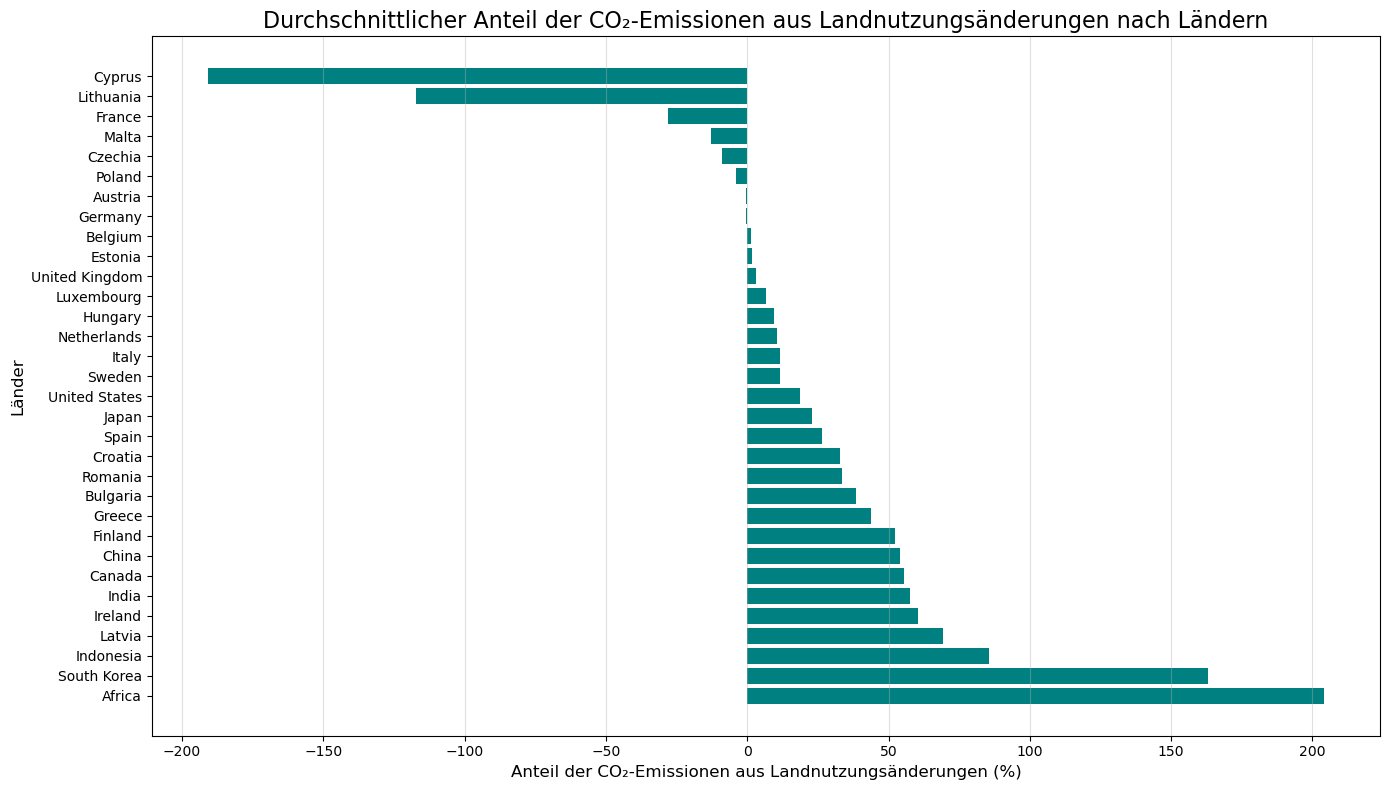

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Laden des Datensatzes
df = pd.read_csv('/Users/michaelweber/Repositories/co2-emissions/df_multi.csv')

# 5.1 Wie groß ist der Einfluss von Landnutzungsänderungen auf die CO₂-Emissionen in verschiedenen Ländern?
# Berechnung des Anteils der Emissionen aus Landnutzungsänderungen
df['land_use_share'] = df['land_use_change_co2'] / df['co2_including_luc'] * 100

# Gruppierung nach Ländern und Berechnung des Durchschnitts
land_use_impact = df.groupby('country')['land_use_share'].mean().sort_values(ascending=False).reset_index()

# Visualisierung
plt.figure(figsize=(14, 8))
plt.barh(land_use_impact['country'], land_use_impact['land_use_share'], color='teal')

# Titel und Beschriftungen
plt.title('Durchschnittlicher Anteil der CO₂-Emissionen aus Landnutzungsänderungen nach Ländern', fontsize=16)
plt.xlabel('Anteil der CO₂-Emissionen aus Landnutzungsänderungen (%)', fontsize=12)
plt.ylabel('Länder', fontsize=12)
plt.grid(axis='x', alpha=0.4)

plt.tight_layout()
plt.show()



In [141]:
import pandas as pd
import plotly.graph_objects as go

# Filter für den Zeitraum 2000–2023
filtered_df = df[(df['year'] >= 2000) & (df['year'] <= 2023)]

# Aggregation der Daten nach Ländern
land_use_impact = filtered_df.groupby('country')[['co2', 'land_use_change_co2']].sum().reset_index()
land_use_impact['other_co2'] = land_use_impact['co2'] - land_use_impact['land_use_change_co2']

# Sortierung der Länder nach Gesamtemissionen und Auswahl der Top 15
land_use_impact = land_use_impact.sort_values('co2', ascending=False).head(15)

# Visualisierung
fig = go.Figure()

# Hinzufügen von CO₂ ohne Landnutzungsänderungen
fig.add_trace(go.Bar(
    x=land_use_impact['country'],
    y=land_use_impact['other_co2'],
    name='Andere CO₂ Emissionen',
    marker_color='steelblue'
))

# Hinzufügen von CO₂ aus Landnutzungsänderungen
fig.add_trace(go.Bar(
    x=land_use_impact['country'],
    y=land_use_impact['land_use_change_co2'],
    name='CO₂ aus Landnutzungsänderungen',
    marker_color='darkorange'
))

# Layout-Anpassungen
fig.update_layout(
    title='Einfluss von Landnutzungsänderungen auf CO₂ Emissionen (2000–2022) - Top 15 Länder',
    xaxis_title='Länder',
    yaxis_title='CO₂ Emissionen (Millionen Tonnen)',
    barmode='group',  # Nebeneinanderstehende Balken
    xaxis=dict(tickangle=45),
    legend=dict(title='Emissionsquellen'),
    plot_bgcolor='rgba(245, 245, 245, 1)'
)

# Grafik anzeigen
fig.show()


In [139]:
import pandas as pd
import plotly.graph_objects as go

# Annahme: 'df' ist Ihr DataFrame mit den CO₂-Daten

# Filter für den Zeitraum 1980–2023
filtered_df = df[(df['year'] >= 1990) & (df['year'] <= 2022)]

# Gruppierung nach Jahr und Aggregation der Emissionen
global_emissions = filtered_df.groupby('year')[['co2', 'land_use_change_co2']].sum().reset_index()
global_emissions['fossil_fuel_co2'] = global_emissions['co2'] - global_emissions['land_use_change_co2']

# Visualisierung
fig = go.Figure()

# CO₂ aus fossilen Brennstoffen
fig.add_trace(go.Scatter(
    x=global_emissions['year'],
    y=global_emissions['fossil_fuel_co2'],
    mode='lines',
    name='CO₂ aus fossilen Brennstoffen',
    line=dict(color='steelblue', width=2),
    marker=dict(size=5)
))

# CO₂ aus Landnutzungsänderungen
fig.add_trace(go.Scatter(
    x=global_emissions['year'],
    y=global_emissions['land_use_change_co2'],
    mode='lines',
    name='CO₂ aus Landnutzungsänderungen',
    line=dict(color='darkorange', width=2),
    marker=dict(size=5)
))

# Layout-Anpassungen
fig.update_layout(
    title='Globale CO₂-Emissionen aus fossilen Brennstoffen und Landnutzung (1990–2022)',
    xaxis_title='Jahr',
    yaxis_title='CO₂-Emissionen (Millionen Tonnen)',
    legend=dict(title='Emissionsquellen'),
    xaxis=dict(tickangle=45),
    plot_bgcolor='rgba(245, 245, 245, 1)'
)

# Grafik anzeigen
fig.show()


In [109]:
import pycountry
print(pycountry.countries.get(name="Germany").alpha_3)

DEU


In [110]:
import pycountry

df_iso = pd.read_csv('/Users/michaelweber/Repositories/co2-emissions/df_multi_backup_iso.csv')

# Funktion zum Abrufen des ISO-Alpha-3-Codes
def get_iso_alpha(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Annahme: Dein DataFrame heißt df und enthält eine Spalte 'country'
df_iso['iso_alpha'] = df_iso['country'].apply(get_iso_alpha)

# Zeige die ersten Zeilen zur Überprüfung
print(df_iso[['country', 'iso_alpha']].head())

  country iso_alpha
0  Africa      None
1  Africa      None
2  Africa      None
3  Africa      None
4  Africa      None


In [111]:
df_iso.head(20)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,iso_alpha
0,Africa,1900,NaN,138755559.0,NaN,0.0,0.0,2330.0,-3188.0,-57769.0,...,4398.0,2.0,4.0,6.0,0.0,319378.0,34964.0,NaN,NaN,None
1,Africa,1901,NaN,139195205.0,NaN,0.0,0.0,3909.0,1579.0,67767.0,...,4365.0,2.0,4.0,6.0,0.0,308228.0,37271.0,NaN,NaN,None
2,Africa,1902,NaN,139666271.0,NaN,0.0,0.0,5826.0,1916.0,49016.0,...,4335.0,2.0,4.0,6.0,0.0,320250.0,39893.0,NaN,NaN,None
3,Africa,1903,NaN,140170120.0,NaN,0.0,0.0,7896.0,2070.0,35535.0,...,4305.0,2.0,4.0,6.0,0.0,322133.0,42600.0,NaN,NaN,None
4,Africa,1904,NaN,140688001.0,NaN,0.0,0.0,8911.0,1015.0,12854.0,...,4282.0,2.0,4.0,6.0,0.0,342755.0,44200.0,NaN,NaN,None
5,Africa,1905,NaN,141220048.0,NaN,0.0,0.0,10263.0,1352.0,15173.0,...,4257.0,2.0,4.0,6.0,0.0,349639.0,46145.0,NaN,NaN,None
6,Africa,1906,NaN,141766391.0,NaN,0.0,0.0,11717.0,1455.0,14174.0,...,4233.0,2.0,4.0,7.0,0.0,355051.0,48382.0,NaN,NaN,None
7,Africa,1907,NaN,142327180.0,NaN,0.0,0.0,12930.0,1213.0,10350.0,...,4206.0,2.0,4.0,7.0,0.0,354829.0,50288.0,NaN,NaN,None
8,Africa,1908,NaN,142902543.0,NaN,0.0,0.0,13403.0,473.0,3655.0,...,4186.0,2.0,4.0,7.0,0.0,373910.0,51397.0,NaN,NaN,None
9,Africa,1909,NaN,143483346.0,NaN,0.0,0.0,15385.0,1982.0,14789.0,...,4169.0,2.0,5.0,7.0,0.0,388415.0,54145.0,NaN,NaN,None


In [114]:
# Funktion zur Zuordnung von ISO-Codes
def get_iso_alpha_3(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except AttributeError:
        return None  # Rückgabe von None, wenn das Land nicht gefunden wird

# Entfernen von Duplikaten und Hinzufügen einer neuen Spalte 'iso_alpha'
unique_countries = df['country'].drop_duplicates()

# Hinzufügen einer neuen Spalte 'iso_alpha' zum DataFrame mit den ISO-Codes
iso_codes = unique_countries.apply(get_iso_alpha_3)

# Drucken von Land und zugehörigem ISO-Code
for country, iso_code in zip(unique_countries, iso_codes):
    print(f"Land: {country}, ISO-Code: {iso_code}")

Land: Africa, ISO-Code: None
Land: Austria, ISO-Code: AUT
Land: Belgium, ISO-Code: BEL
Land: Bulgaria, ISO-Code: BGR
Land: Canada, ISO-Code: CAN
Land: China, ISO-Code: CHN
Land: Croatia, ISO-Code: HRV
Land: Cyprus, ISO-Code: CYP
Land: Czechia, ISO-Code: CZE
Land: Estonia, ISO-Code: EST
Land: Finland, ISO-Code: FIN
Land: France, ISO-Code: FRA
Land: Germany, ISO-Code: DEU
Land: Greece, ISO-Code: GRC
Land: Hungary, ISO-Code: HUN
Land: India, ISO-Code: IND
Land: Indonesia, ISO-Code: IDN
Land: Ireland, ISO-Code: IRL
Land: Italy, ISO-Code: ITA
Land: Japan, ISO-Code: JPN
Land: Latvia, ISO-Code: LVA
Land: Lithuania, ISO-Code: LTU
Land: Luxembourg, ISO-Code: LUX
Land: Malta, ISO-Code: MLT
Land: Netherlands, ISO-Code: NLD
Land: Poland, ISO-Code: POL
Land: Romania, ISO-Code: ROU
Land: South Korea, ISO-Code: None
Land: Spain, ISO-Code: ESP
Land: Sweden, ISO-Code: SWE
Land: United Kingdom, ISO-Code: GBR
Land: United States, ISO-Code: USA


In [135]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("/Users/michaelweber/Repositories/co2-emissions/df_multi_backup_iso.csv")

fig = px.choropleth(
    df,
    locations="iso_code",          
    color="co2_per_capita",         
    hover_name="country",           
    animation_frame="year",         
    title="Pro-Kopf-CO₂-Emissionen nach Ländern (2000–2023)",
    labels={"co2_per_capita": "CO₂-Emissionen (pro Kopf)"}, 
    color_continuous_scale="Viridis"  
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type="equirectangular"),
    coloraxis_colorbar=dict(title="CO₂-Emissionen pro Kopf"),
    template='plotly_white'
)

fig.show()